# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from statsmodels.tools.tools import add_constant
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from xgboost import XGBClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from sklearn.ensemble import BaggingClassifier,RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

ImportError: ignored

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

# read the data
import pandas as pd
# read the data using the pandas dataframe 
df = pd.read_csv('/content/drive/MyDrive/DS/EasyVisa.csv')

Mounted at /content/drive


In [ ]:
# Create copy of dataframe df_easy_visa to avoid any changes to original dataframe

df_easy_visa = df.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
# returns the first 5 rows
df_easy_visa.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
# return the shape of the data set
df_easy_visa.shape

(25480, 12)

Observations:

1.   It is observed that , dataframe has 25480 rows and 12 columns.





In [ ]:
# Checking the data types of the columns for the dataset
df_easy_visa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


####Observations:


1. info() returns pandas dataframe and has total of 12 columns .
2. It is observed there is 1 column(s) with float64 datatype, 2 column(s) with int64 and 9 column(s) with object Data type.
3. In total, info() uses memory usage of 2.3+ KB.
4. There are 4 columns( Column, Non-Null, Count, Dtype) with 12 rows.


In [ ]:
# Statistical summary of the dataset

df_easy_visa.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


####Observations:

1.  It is observed that in total there are employees from 6 contintents and most of them are from Asia.
2.  It is observed that most of the employees region of employment is from Northeast.
3.  It is observed that average number of employees is 5667, and the median number of employees is 2019 in the organization.It signifies that number of employees is right skewed.
4. It is observed that prevailing wage of employees ith mean value is 74455 and the median wage is 70308. It implies that we have the data for this attribute as right skewed.
5. It is observed that year of establishment of the companies is from 1800 to 2016, looks like it has more wide range of data .
6. It is observed that most of the applicants case status is certified .



In [ ]:
# Check the NULL values in the dataframe

print (df_easy_visa.isnull().sum())

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64


####Observations####

1.   It is observed that no duplicate values are found in any of the columns in dataset.

In [ ]:
# Find the duplicate rows in the data set

dups = df_easy_visa[df_easy_visa.duplicated()]

if dups.empty:
  print ("No duplicates found in the Dataset")
else:
  print (dups)

No duplicates found in the Dataset


####Observations####

1.   It is observed that no duplicates are found in the dataset.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

# Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.grid()

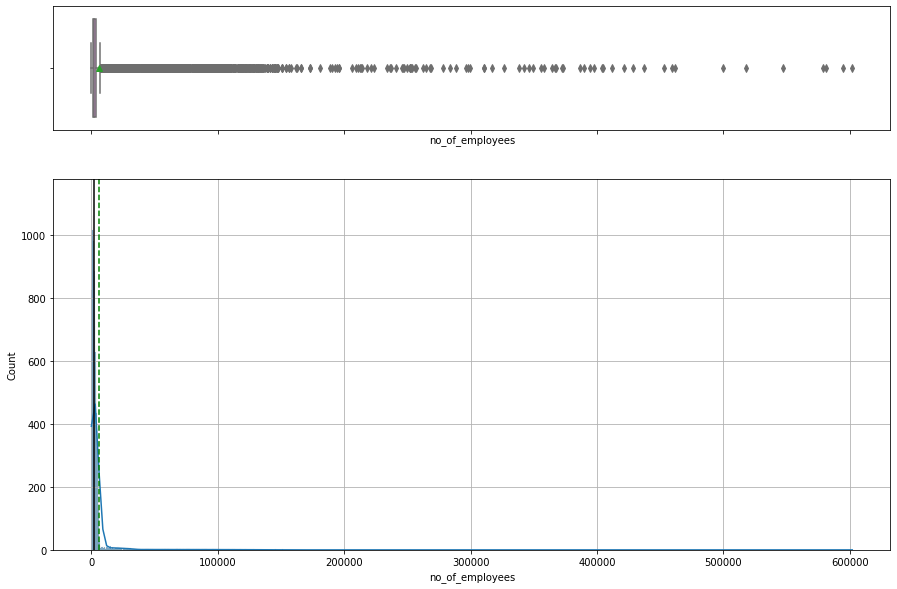

In [ ]:
# Below Histplot and boxplot show the data for the no_of_employees column.

histogram_boxplot(df_easy_visa, "no_of_employees")

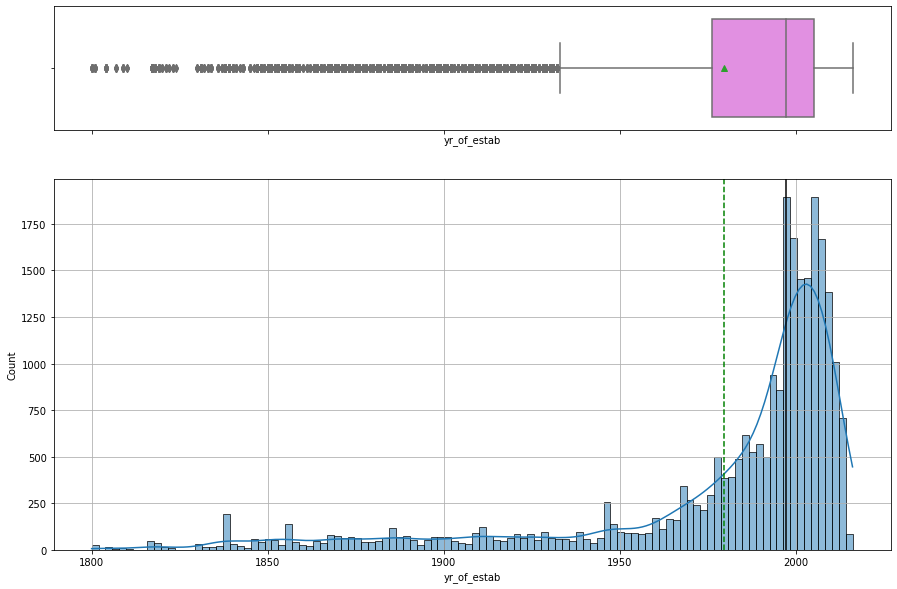

In [ ]:
# Below Histplot and boxplot show the data for the yr_of_estab column.

histogram_boxplot(df_easy_visa, "yr_of_estab")

####Observations:

1.  It is observed that year of established column is skewed left.



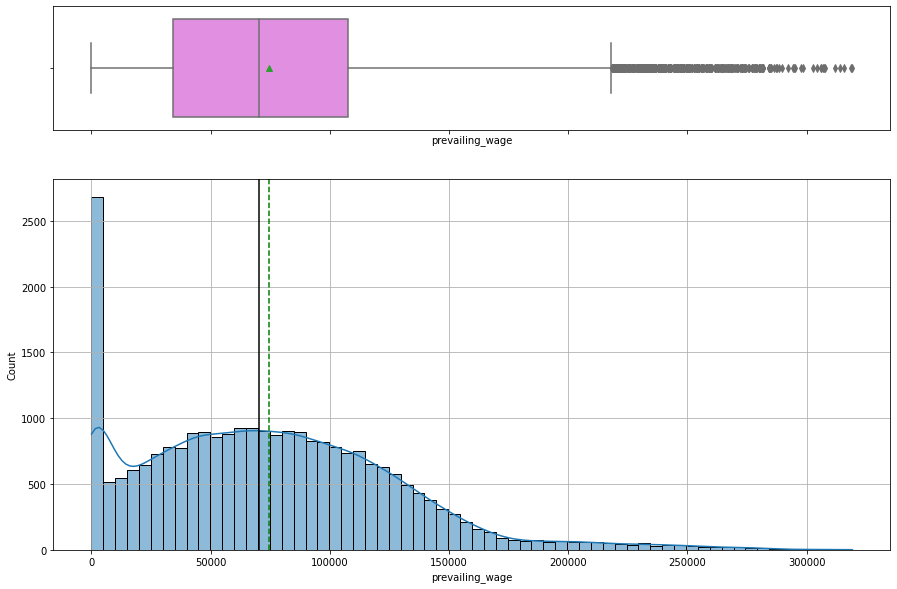

In [ ]:
# Below Histplot and boxplot show the data for the prevailing_wage column.

histogram_boxplot(df_easy_visa, "prevailing_wage")

####Observations

1.   It is observed that prevailing_wage is slightly right skewed.



In [ ]:
# Below is the function to create  barplots (or) countplots to understand the variation of data 


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=11,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.grid()
    plt.show()  # show the plot
    

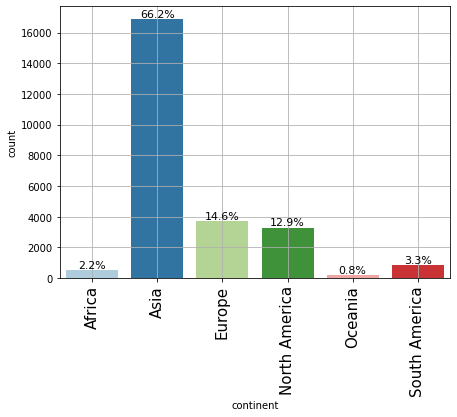

In [ ]:
# Below countplot show the data for the continent column.

labeled_barplot(df_easy_visa, "continent", perc=True)

####Observations

1.  It is observed that most of the applicants (or) employees are from Asia continent.



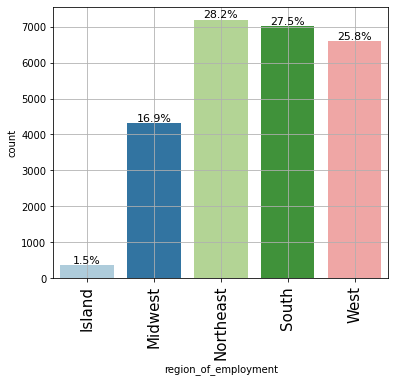

In [ ]:
# Below countplot show the data for the region_of_employment column.

labeled_barplot(df_easy_visa, "region_of_employment", perc=True)

####Observations

1. It is observed that employees are mostly from the northeast followed by south.

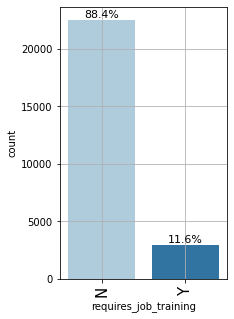

In [ ]:
# Below countplot show the data for the requires_job_training column.

labeled_barplot(df_easy_visa, "requires_job_training", perc=True)

####Observations

1.   It is observed that 88.4% of the employees donot require job training.
2.   It is observed that remaining 11.6% of the employees require job training.



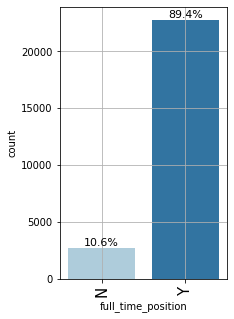

In [ ]:
# Below countplot show the data for the full_time_position column.

labeled_barplot(df_easy_visa, "full_time_position", perc=True)


####Observations

1.   It is observed that 89.4% of the employees are in the full time position.
2.   It is observed that only 10.6% of the employees are in the contract position.







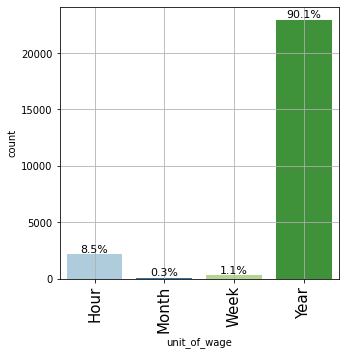

In [ ]:
# Below countplot show the data for the unit_of_wage column.

labeled_barplot(df_easy_visa, "unit_of_wage", perc=True)


####Observations

1.   It is observed that employees with unit_of_wage as Year are the highest with 90.1%





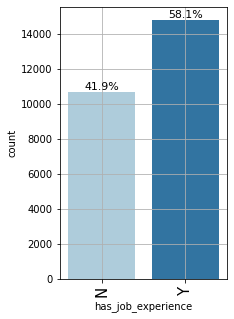

In [ ]:
# Below countplot show the data for the has_job_experience column.

labeled_barplot(df_easy_visa, "has_job_experience", perc=True)


####Observations

1.   It is observed that employees with job experience are 58.1%
2.   It is observed that employees with no job experience are 41.9%



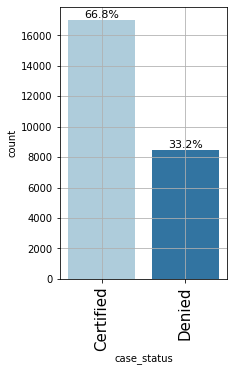

In [ ]:
# Below countplot show the data for the case_status column.

labeled_barplot(df_easy_visa, "case_status", perc=True)


####Obsevations

1.   It is observed that number of employees with case status Certified is 66.8%
2.   It is observed that number of employees with case status denied is 33.2%, we need to understand and analyze more on different reasons for the case status to be denied.



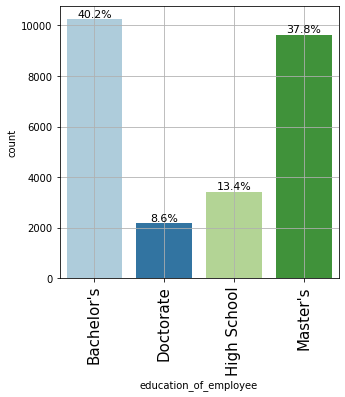

In [ ]:
# Below countplot show the data for the education_of_employee column.

labeled_barplot(df_easy_visa, "education_of_employee", perc=True)


####Observation

1.   It is observed that employees with Bachelors are 40.2%
2.   It is observed that employees with Masters degree are 37.8%



# Bivariate Analysis

  education_of_employee case_status  percentages
0            Bachelor's   Certified    62.214188
1            Bachelor's      Denied    37.785812
2             Doctorate   Certified    87.226277
3             Doctorate      Denied    12.773723
4           High School   Certified    34.035088
5           High School      Denied    65.964912
6              Master's   Certified    78.627777
7              Master's      Denied    21.372223


<Figure size 1080x504 with 0 Axes>

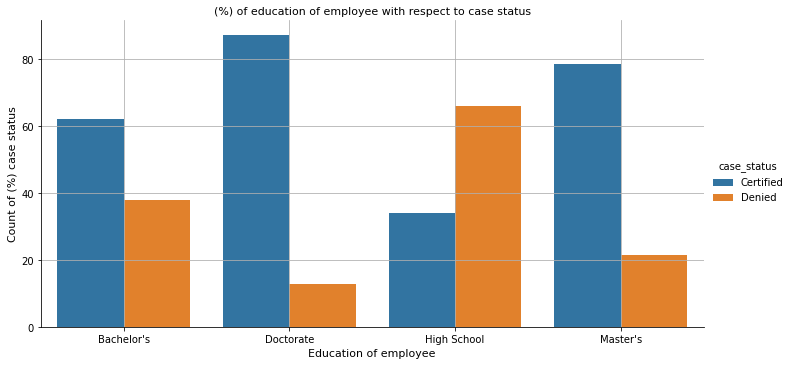

In [ ]:
# function to plot stacked bar chart, to check the education of the employee has any impact with the case status


df_vals = df_easy_visa.groupby('education_of_employee')['case_status'].value_counts(normalize=True).sort_index().to_frame('percentages')*100
df_vals = df_vals.reset_index()
print (df_vals)

plt.figure(figsize = (15, 7))
sns.catplot(data = df_vals, x = 'education_of_employee', y = 'percentages', hue = 'case_status',
                 kind='bar', height = 5, aspect=2)
plt.title("(%) of education of employee with respect to case status", fontsize=11)
plt.xlabel("Education of employee", fontsize=11);
plt.ylabel("Count of (%) case status", fontsize=11);

plt.grid()

####Observation

1.   It is observed that Doctorate, Masters have less number of case status as denials .
2.   It is observed that Doctorate, Masters have High number of case status as  approval or certified.



  full_time_position case_status  percentages
0                  N   Certified    68.526044
1                  N      Denied    31.473956
2                  Y   Certified    66.583235
3                  Y      Denied    33.416765


<Figure size 1080x504 with 0 Axes>

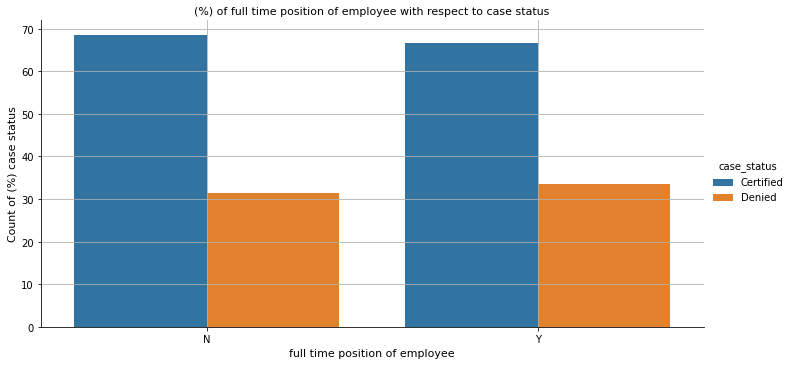

In [ ]:
# function to plot stacked bar chart, to check the full time position of the employee has any impact with the case status


df_vals = df_easy_visa.groupby('full_time_position')['case_status'].value_counts(normalize=True).sort_index().to_frame('percentages')*100
df_vals = df_vals.reset_index()
print (df_vals)

plt.figure(figsize = (15, 7))
sns.catplot(data = df_vals, x = 'full_time_position', y = 'percentages', hue = 'case_status',
                 kind='bar', height = 5, aspect=2)
plt.title("(%) of full time position of employee with respect to case status", fontsize=11)
plt.xlabel("full time position of employee", fontsize=11);
plt.ylabel("Count of (%) case status", fontsize=11);

plt.grid()


####Observation

1.   It is observed that total  full time employees with case status as certified is 66.68%.
2.   It is observed that total  full time employees with case status as Denied is 33.42%.
3.   It is observed that total  of not full time employees with case status as certified is 68.53%.
4.   It is observed that total  of not full time employees with case status as Denied is 31.48%.




  has_job_experience case_status  percentages
0                  N   Certified    56.134108
1                  N      Denied    43.865892
2                  Y   Certified    74.476422
3                  Y      Denied    25.523578


<Figure size 1080x504 with 0 Axes>

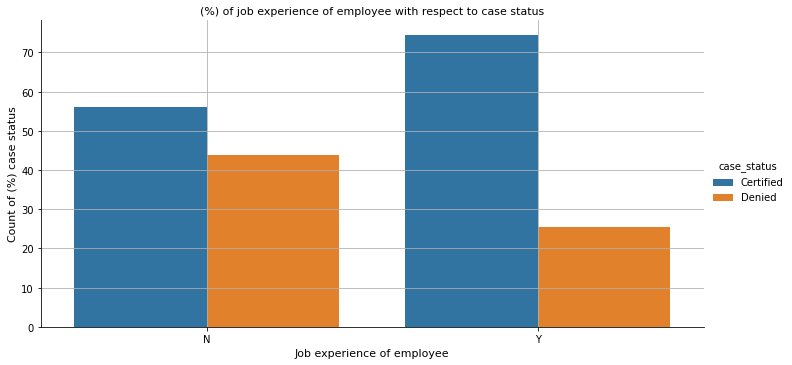

In [ ]:
# function to plot stacked bar chart, to check the job experience of the employee has any impact with the case status


df_vals = df_easy_visa.groupby('has_job_experience')['case_status'].value_counts(normalize=True).sort_index().to_frame('percentages')*100
df_vals = df_vals.reset_index()
print (df_vals)

plt.figure(figsize = (15, 7))
sns.catplot(data = df_vals, x = 'has_job_experience', y = 'percentages', hue = 'case_status',
                 kind='bar', height = 5, aspect=2)
plt.title("(%) of job experience of employee with respect to case status", fontsize=11)
plt.xlabel("Job experience of employee", fontsize=11);
plt.ylabel("Count of (%) case status", fontsize=11);

plt.grid()

####Observation

1.   It is observed that Overall 74.47% of case status as certified is high with employees having job experience .
2.   It is observed that Overall case status as certified with no experience is around 56%. 




  region_of_employment case_status  percentages
0               Island   Certified    60.266667
1               Island      Denied    39.733333
2              Midwest   Certified    75.528210
3              Midwest      Denied    24.471790
4            Northeast   Certified    62.904795
5            Northeast      Denied    37.095205
6                South   Certified    70.015676
7                South      Denied    29.984324
8                 West   Certified    62.253265
9                 West      Denied    37.746735


<Figure size 1080x504 with 0 Axes>

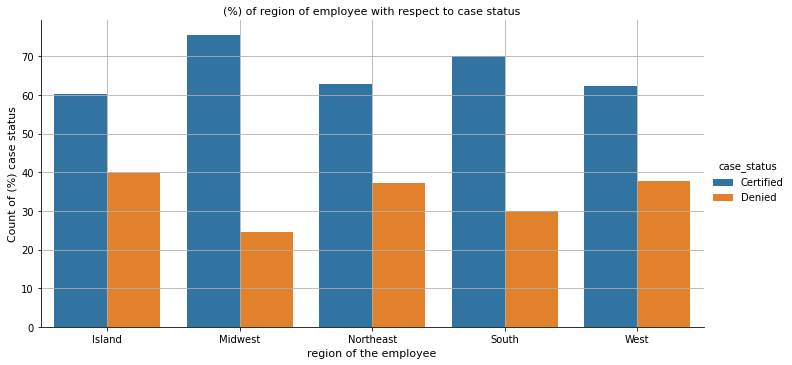

In [ ]:
# function to plot stacked bar chart, to check the region of the employment of the employee has any impact with the case status


df_vals = df_easy_visa.groupby('region_of_employment')['case_status'].value_counts(normalize=True).sort_index().to_frame('percentages')*100
df_vals = df_vals.reset_index()
print (df_vals)

plt.figure(figsize = (15, 7))
sns.catplot(data = df_vals, x = 'region_of_employment', y = 'percentages', hue = 'case_status',
                 kind='bar', height = 5, aspect=2)
plt.title("(%) of region of employee with respect to case status", fontsize=11)
plt.xlabel("region of the employee", fontsize=11);
plt.ylabel("Count of (%) case status", fontsize=11);

plt.grid()

####Observation

1.   It is observed that Continent Midest has the highest number of certified cases.
2.   It is observed that Continent south has the second highest number of certified cases.



  requires_job_training case_status  percentages
0                     N   Certified    66.645949
1                     N      Denied    33.354051
2                     Y   Certified    67.884941
3                     Y      Denied    32.115059


<Figure size 1080x504 with 0 Axes>

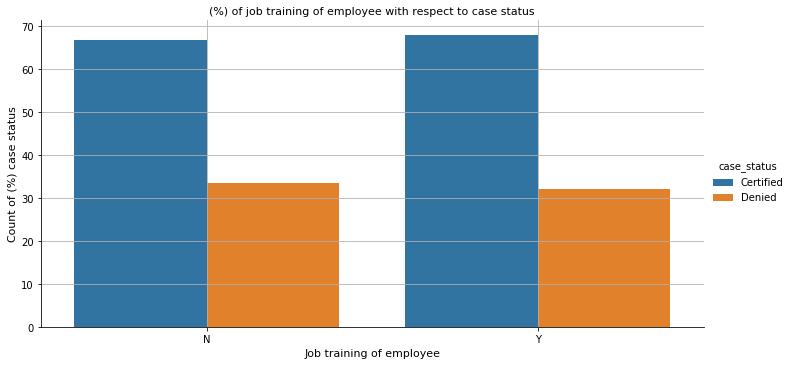

In [ ]:
# function to plot stacked bar chart, to check the job training of the employee has any impact with the case status


df_vals = df_easy_visa.groupby('requires_job_training')['case_status'].value_counts(normalize=True).sort_index().to_frame('percentages')*100
df_vals = df_vals.reset_index()
print (df_vals)

plt.figure(figsize = (15, 7))
sns.catplot(data = df_vals, x = 'requires_job_training', y = 'percentages', hue = 'case_status',
                 kind='bar', height = 5, aspect=2)
plt.title("(%) of job training of employee with respect to case status", fontsize=11)
plt.xlabel("Job training of employee", fontsize=11);
plt.ylabel("Count of (%) case status", fontsize=11);

plt.grid()

####Observations

1. It is observed that employees who donot require job training and case status certified is almost 66.65% .
2. It is observed that employees who donot require job training and case status denied is ith number of 33.35% .
3. It is observed that employees who require job training and are with case status as certitied is 67.88% .
4. It is observed that employees who require job training and are with case status as denied are 32.12% .

        continent case_status  percentages
0          Africa   Certified    72.050817
1          Africa      Denied    27.949183
2            Asia   Certified    65.310480
3            Asia      Denied    34.689520
4          Europe   Certified    79.233655
5          Europe      Denied    20.766345
6   North America   Certified    61.877278
7   North America      Denied    38.122722
8         Oceania   Certified    63.541667
9         Oceania      Denied    36.458333
10  South America   Certified    57.863850
11  South America      Denied    42.136150


<Figure size 1080x504 with 0 Axes>

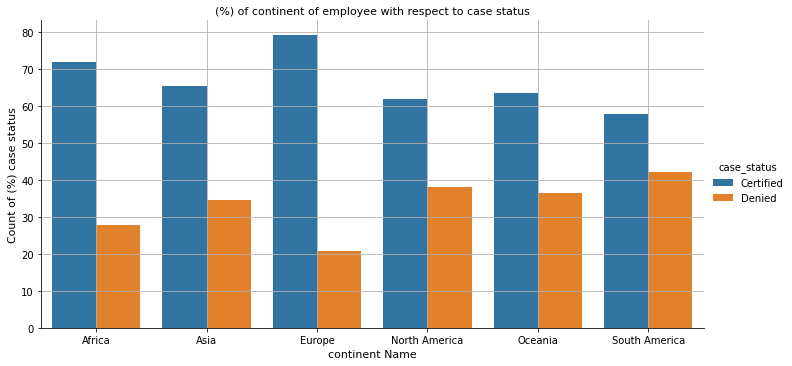

In [ ]:
# function to plot stacked bar chart, to check the Continent  has any impact with the case status


df_vals = df_easy_visa.groupby('continent')['case_status'].value_counts(normalize=True).sort_index().to_frame('percentages')*100
df_vals = df_vals.reset_index()
print (df_vals)

plt.figure(figsize = (15, 7))
sns.catplot(data = df_vals, x = 'continent', y = 'percentages', hue = 'case_status',
                 kind='bar', height = 5, aspect=2)
plt.title("(%) of continent of employee with respect to case status", fontsize=11)
plt.xlabel("continent Name", fontsize=11);
plt.ylabel("Count of (%) case status", fontsize=11);

plt.grid()

####Observations

1.   It is observed that europe continent has the highest number of certified case status with almost 80 % .
2.   It is observed that Africa continent has the second highest number of Certified case status with 73% .





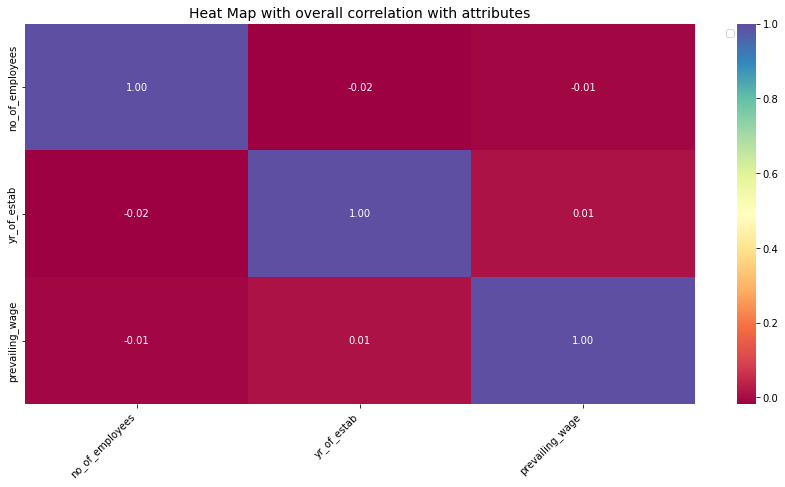

In [ ]:
''' Find out relation between different attributes  '''

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(15,7))

# Below is the heatmap used with seaborn library on correlating the relation between different attributes  and  dataframe 'df_easy_visa'

sns.heatmap(df_easy_visa.corr(), annot=True, fmt=".2f", cmap="Spectral")

# xticks is used to rotate the x label

plt.legend(bbox_to_anchor=(1.04, 1.0), loc='upper left')
plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.title ('Heat Map with overall correlation with attributes', fontsize=14);


####Observations

1. It is observed that attributes have very week correlation . 


<Figure size 1080x504 with 0 Axes>

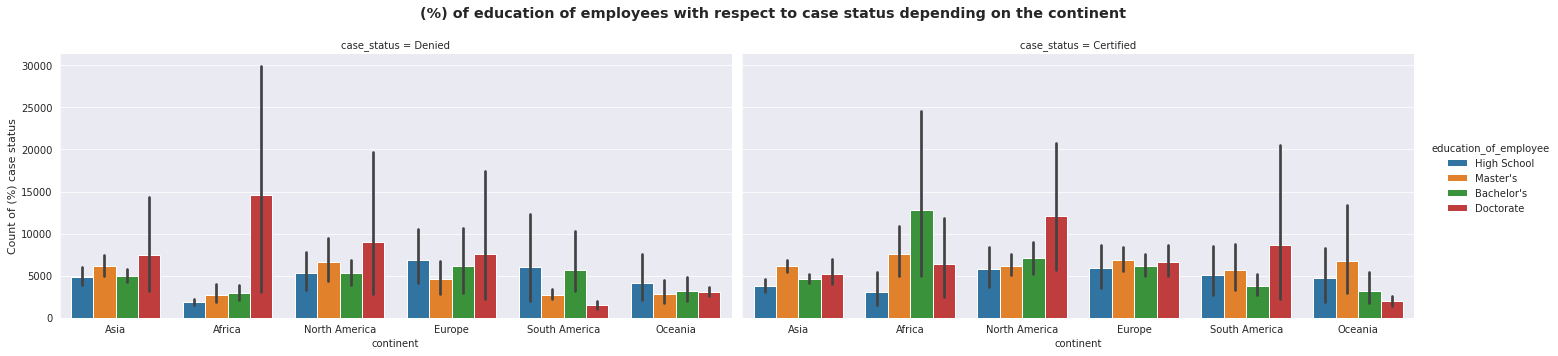

In [ ]:
# function to plot  bar chart, to check the continent from the employee has any impact with the case status and with respect to the education


plt.figure(figsize = (15, 7));
sns.set_style("darkgrid")
g = sns.catplot(x = 'continent', y ='no_of_employees', hue = 'education_of_employee', col="case_status", data = df_easy_visa, kind='bar', height = 5, aspect=2 );
g.fig.suptitle("(%) of education of employees with respect to case status depending on the continent" ,
               fontsize = 'x-large' , 
               fontweight = 'bold' )
g.set_ylabels("Count of (%) case status", fontsize=11);
g.fig.subplots_adjust( top = 0.85)



####Observations

1.   It is observed that Doctorate from Africa continent have highest number of case status as denied.
2.   It is observed that Doctorate from North America continent have highest number of case status as certified. 



12802
  education_of_employee case_status  counts
0            Bachelor's   Certified    3301
1            Bachelor's      Denied    1807
2             Doctorate   Certified     775
3             Doctorate      Denied     111
4           High School   Certified     555
5           High School      Denied    1064
6              Master's   Certified    4179
7              Master's      Denied    1010


<Figure size 864x576 with 0 Axes>

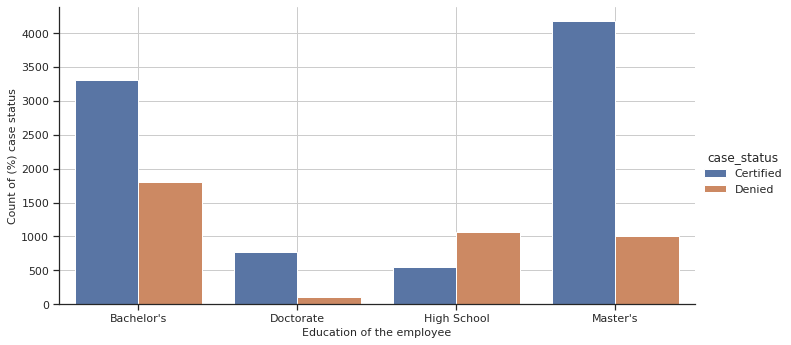

In [ ]:
# code to plot stacked bar chart, to check the employees who are above median previaling wage and  education of the employee has any impact with the case status

plt.figure(figsize = (12, 8))

# Below we are considering dataframe which is having records above the median prevailing wage

df_easy_visa_md = df_easy_visa[df_easy_visa['prevailing_wage']>70000]
print (len(df_easy_visa_md))
df_easy_visa_md = df_easy_visa_md.groupby(['education_of_employee','case_status']).size().reset_index()
df_easy_visa_md.columns=["education_of_employee","case_status","counts"]
print (df_easy_visa_md)

sns.catplot(data = df_easy_visa_md, x = 'education_of_employee', y = 'counts', hue = 'case_status',
                 kind='bar', height = 5, aspect=2)
plt.xlabel("Education of the employee", fontsize=11);
plt.ylabel("Count of (%) case status", fontsize=11);
plt.grid()



####Observation

1.   It is observed that Masters have the highest number of case status as certified with count of 4179, who are above the median prevailing wage.
2.  It is observed that Bachelors have the second highest number of cases
as certified with count of 3301 and surprisingly, the denials are the highest with 1807.


**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 


  education_of_employee case_status  percentages
0            Bachelor's   Certified    62.214188
1            Bachelor's      Denied    37.785812
2             Doctorate   Certified    87.226277
3             Doctorate      Denied    12.773723
4           High School   Certified    34.035088
5           High School      Denied    65.964912
6              Master's   Certified    78.627777
7              Master's      Denied    21.372223


<Figure size 1080x504 with 0 Axes>

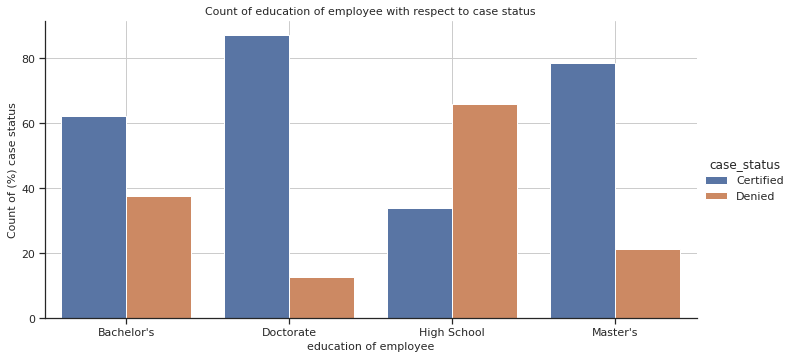

In [ ]:
# function to plot stacked bar chart, to check the education of the employee has any impact with the case status

df_vals = df_easy_visa.groupby('education_of_employee')['case_status'].value_counts(normalize=True).sort_index().to_frame('percentages')*100
df_vals = df_vals.reset_index()
print (df_vals)
sns.set(style="ticks")
plt.figure(figsize = (15, 7));
sns.catplot(data = df_vals, x = 'education_of_employee', y = 'percentages', hue = 'case_status',
                 kind='bar', height = 5, aspect=2)
plt.title("Count of education of employee with respect to case status", fontsize=11)
plt.xlabel("education of employee", fontsize=11);
plt.ylabel("Count of (%) case status", fontsize=11);
plt.grid()

####Observation

1. It is observed that education of employee plays role in the VISA certification.
2. It is observed that employees with Masters are having highest number of VISA certified  7575, Bachelor's have 6367, Doctorate have 1912 and High school have around 2300.



2. How does the visa status vary across different continents? 

        continent case_status  percentages
0          Africa   Certified    72.050817
1          Africa      Denied    27.949183
2            Asia   Certified    65.310480
3            Asia      Denied    34.689520
4          Europe   Certified    79.233655
5          Europe      Denied    20.766345
6   North America   Certified    61.877278
7   North America      Denied    38.122722
8         Oceania   Certified    63.541667
9         Oceania      Denied    36.458333
10  South America   Certified    57.863850
11  South America      Denied    42.136150


<Figure size 1080x504 with 0 Axes>

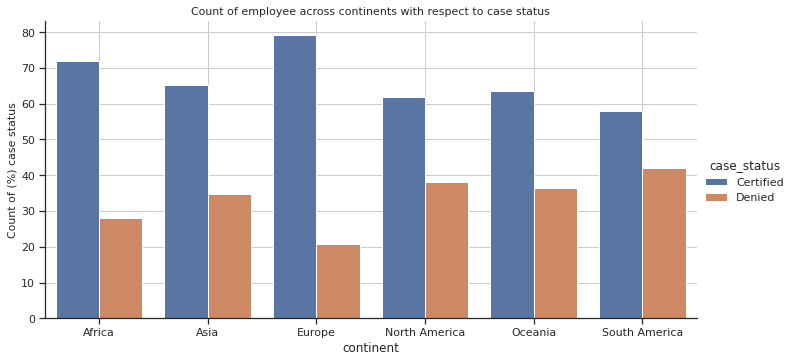

In [ ]:
# function to plot stacked bar chart, to check the  employee across continents and has any impact with the case status

df_vals = df_easy_visa.groupby('continent')['case_status'].value_counts(normalize=True).sort_index().to_frame('percentages')*100
df_vals = df_vals.reset_index()
print (df_vals)
sns.set(style="ticks")
plt.figure(figsize = (15, 7));
sns.catplot(data = df_vals, x = 'continent', y = 'percentages', hue = 'case_status',
                 kind='bar', height = 5, aspect=2)
plt.title("Count of employee across continents with respect to case status", fontsize=11)
plt.ylabel("Count of (%) case status", fontsize=11);
plt.grid()

####Observation

1.   It is observed that Europe continent has the highest number of Visa status as certified with around 80%.
2.   It is observed that Africa has the next highest visa status as certified with 72% .
3. It is observed that Asia continent has 65%, Oceania continent has 64% .
4. It is observed that South America continent has  58% as visa status as certified. 



3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 

  has_job_experience case_status  percentages
0                  N   Certified    56.134108
1                  N      Denied    43.865892
2                  Y   Certified    74.476422
3                  Y      Denied    25.523578


<Figure size 1080x504 with 0 Axes>

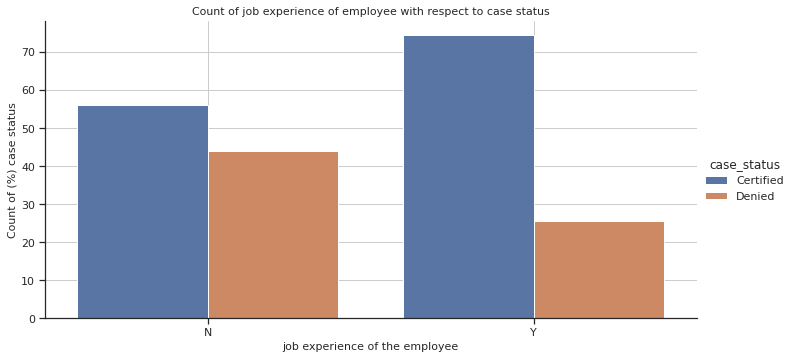

In [ ]:
# function to plot stacked bar chart, to check the job experience of the employee has any impact with the case status

df_vals = df_easy_visa.groupby('has_job_experience')['case_status'].value_counts(normalize=True).sort_index().to_frame('percentages')*100
df_vals = df_vals.reset_index()
print (df_vals)
sns.set(style="ticks")
plt.figure(figsize = (15, 7));
sns.catplot(data = df_vals, x = 'has_job_experience', y = 'percentages', hue = 'case_status',
                 kind='bar', height = 5, aspect=2)
plt.title("Count of job experience of employee with respect to case status", fontsize=11)
plt.xlabel("job experience of the employee", fontsize=11);
plt.ylabel("Count of (%) case status", fontsize=11);
plt.grid()


4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 

  unit_of_wage case_status  percentages
0         Hour   Certified    34.631433
1         Hour      Denied    65.368567
2        Month   Certified    61.797753
3        Month      Denied    38.202247
4         Week   Certified    62.132353
5         Week      Denied    37.867647
6         Year   Certified    69.885027
7         Year      Denied    30.114973


<Figure size 1080x504 with 0 Axes>

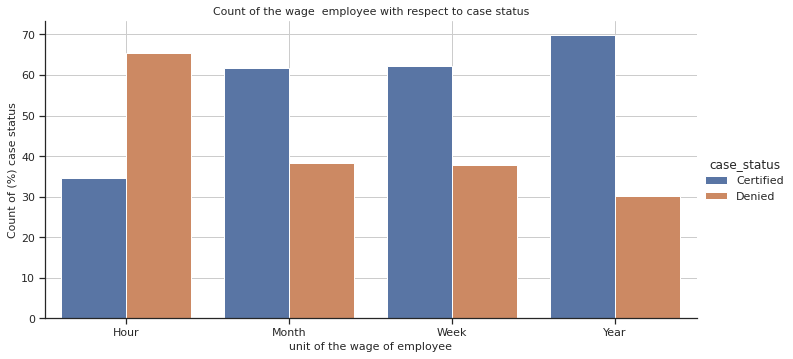

In [ ]:
# function to plot stacked bar chart, to check the unit of the wage employee has any impact with the case status

df_vals = df_easy_visa.groupby(['unit_of_wage'])['case_status'].value_counts(normalize=True).sort_index().to_frame('percentages')*100
df_vals = df_vals.reset_index()

# As, the question is more specific to United states and the case status as certified, filter the entire data frame as below
#df_vals = df_vals.loc[(df_vals['continent'] == 'North America') & (df_vals['case_status'] == 'Certified')]

print (df_vals)
sns.set(style="ticks")
plt.figure(figsize = (15, 7));
sns.catplot(data = df_vals, x = 'unit_of_wage', y = 'percentages', hue = 'case_status',
                 kind='bar', height = 5, aspect=2)


plt.title("Count of the wage  employee with respect to case status", fontsize=11)
plt.xlabel("unit of the wage of employee", fontsize=11);
plt.ylabel("Count of (%) case status", fontsize=11);
plt.grid()


####Observations

1.   It is observed that Year Unit of wage of employees have 70% chance of being certified.
2.   It is observed that Month unit of wage has 61%, week has 62% and Hour has 34% chance of case status as certified.



5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

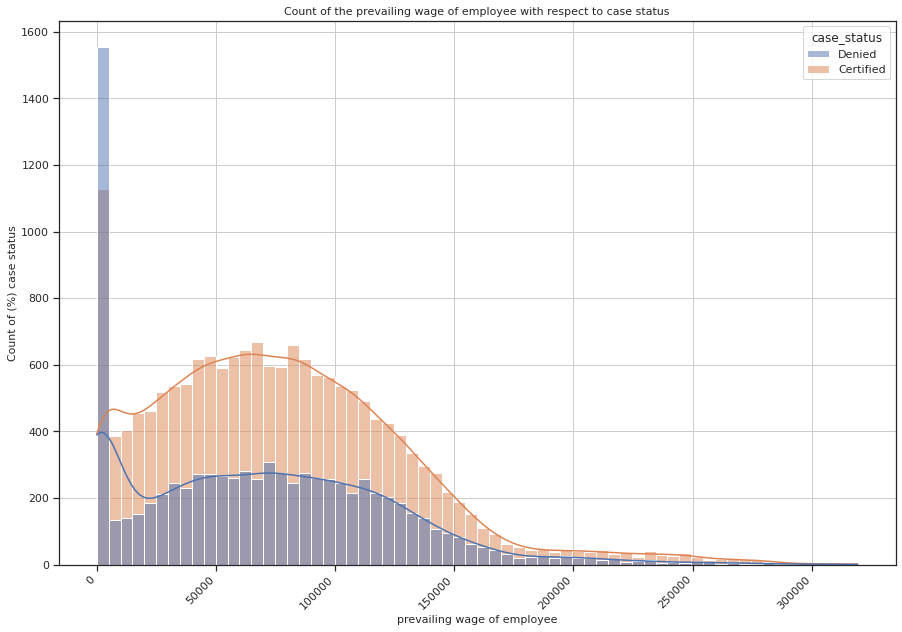

In [ ]:
# function to plot hist chart, to check the prevailing wage employee has any impact with the case status

plt.figure(figsize=(15,10))
sns.set(style="ticks")
sns.histplot(df_easy_visa, x = "prevailing_wage", hue = "case_status", kde=True)
plt.xticks(rotation= 45, ha='right');
plt.title("Count of the prevailing wage of employee with respect to case status", fontsize=11)
plt.xlabel("prevailing wage of employee", fontsize=11);
plt.ylabel("Count of (%) case status", fontsize=11);
plt.grid()

####Observations

1.   It is observed that no# of denied case status less , when the prevailing wage of employee is less and gradually increases when the prevailing wage increases. 






## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

# Outlier detection and treatment

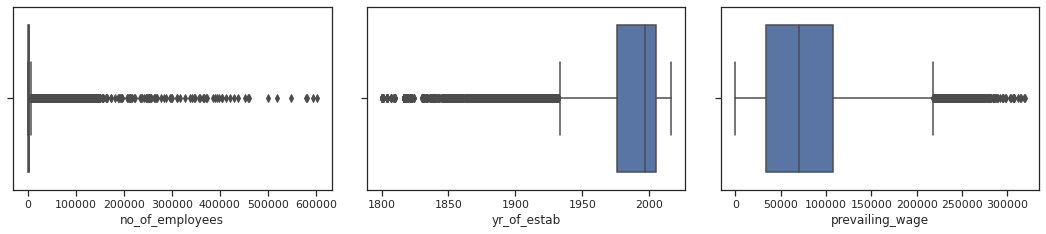

In [ ]:
# outlier detection using boxplot
num_cols = df_easy_visa.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df_easy_visa, x=variable)
    plt.tight_layout(pad=2)

plt.show()

####Observations

1.   It is observed that few outliers are in prevailing_wage column .
2.   It is observed that high number of outliers are in  the number of employess , year of establishment columns but will treat any of these columns for now. 



# Missing Values Treatment

In [ ]:
# Check the NULL values in the dataframe

print (df_easy_visa.isnull().sum())

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64


In [ ]:
# we create another copy of the dataframe df_easy_visa_cpy to avoid changes to the original dataframe

df_easy_visa_cpy = df.copy()

In [ ]:
# encoding the case status column
df_easy_visa_cpy["case_status"] = df_easy_visa_cpy["case_status"].apply(lambda x: 0 if x == "Denied" else 1)

In [ ]:
# defining X and y variables

# Dropped  the column(s) case_status and case_id

X = df_easy_visa_cpy.drop(["case_status","case_id"], axis=1) 
y = df_easy_visa_cpy["case_status"]

print(X.head())
print(y.head())

# adding a contstant to X variable
X = add_constant(X)

  continent education_of_employee has_job_experience requires_job_training  \
0      Asia           High School                  N                     N   
1      Asia              Master's                  Y                     N   
2      Asia            Bachelor's                  N                     Y   
3      Asia            Bachelor's                  N                     N   
4    Africa              Master's                  Y                     N   

   no_of_employees  yr_of_estab region_of_employment  prevailing_wage  \
0            14513         2007                 West         592.2029   
1             2412         2002            Northeast       83425.6500   
2            44444         2008                 West      122996.8600   
3               98         1897                 West       83434.0300   
4             1082         2005                South      149907.3900   

  unit_of_wage full_time_position  
0         Hour                  Y  
1         Year      

In [ ]:
# encoding categorical variables

X = pd.get_dummies(
                   X, 
                   columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True
                  )

print(X.shape)
X.head()

(25480, 22)


,const,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,...,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
0,1.0,14513,2007,592.2029,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1.0,2412,2002,83425.6500,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,1
2,1.0,44444,2008,122996.8600,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,1
3,1.0,98,1897,83434.0300,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,1.0,1082,2005,149907.3900,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,1


####Observations

1.   It is observed that the above object and Category data type columns will be considered for the oneHotEncoding for the transformation of the data.




## EDA

# - It is a good idea to explore the data once again after manipulating it.

1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

  education_of_employee  case_status  percentages
0            Bachelor's            0    37.785812
1            Bachelor's            1    62.214188
2             Doctorate            0    12.773723
3             Doctorate            1    87.226277
4           High School            0    65.964912
5           High School            1    34.035088
6              Master's            0    21.372223
7              Master's            1    78.627777


<Figure size 1080x504 with 0 Axes>

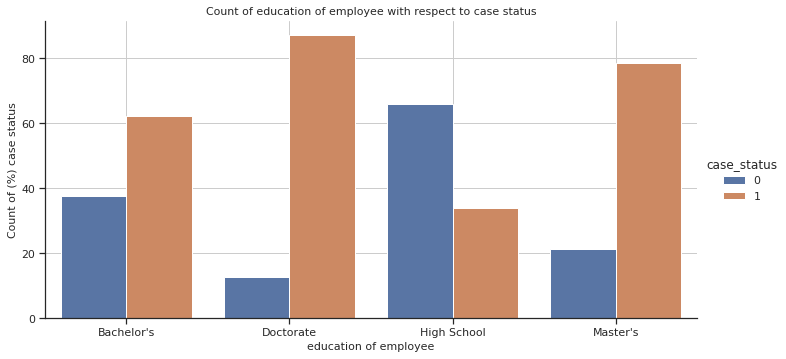

In [ ]:
# function to plot stacked bar chart, to check the education of the employee has any impact with the case status

df_vals = df_easy_visa_cpy.groupby('education_of_employee')['case_status'].value_counts(normalize=True).sort_index().to_frame('percentages')*100
df_vals = df_vals.reset_index()
print (df_vals)
sns.set(style="ticks")
plt.figure(figsize = (15, 7));
sns.catplot(data = df_vals, x = 'education_of_employee', y = 'percentages', hue = 'case_status',
                 kind='bar', height = 5, aspect=2)
plt.title("Count of education of employee with respect to case status", fontsize=11)
plt.xlabel("education of employee", fontsize=11);
plt.ylabel("Count of (%) case status", fontsize=11);
plt.grid()


####Observations

1.   It is observed that employee having Doctorate education has highest cases as certified with 87% .
2.   It is observed that employee having Master's education has next highest cases as certified with 78% .



 2. How does the visa status vary across different continents? 

        continent  case_status  percentages
0          Africa            0    27.949183
1          Africa            1    72.050817
2            Asia            0    34.689520
3            Asia            1    65.310480
4          Europe            0    20.766345
5          Europe            1    79.233655
6   North America            0    38.122722
7   North America            1    61.877278
8         Oceania            0    36.458333
9         Oceania            1    63.541667
10  South America            0    42.136150
11  South America            1    57.863850


<Figure size 1080x504 with 0 Axes>

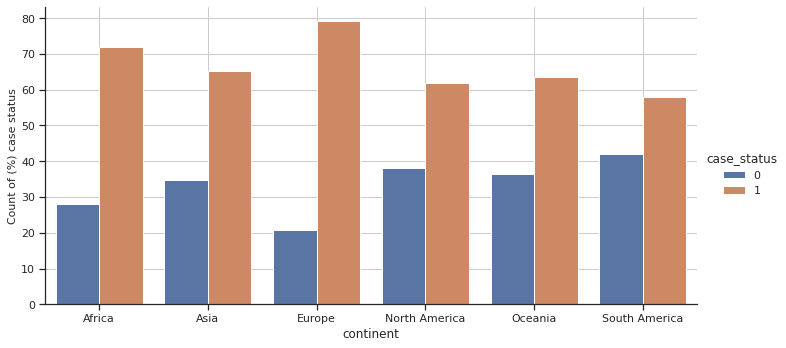

In [ ]:
# function to plot stacked bar chart, to check the education of the employee has any impact with the case status

df_vals = df_easy_visa_cpy.groupby('continent')['case_status'].value_counts(normalize=True).sort_index().to_frame('percentages')*100
df_vals = df_vals.reset_index()
print (df_vals)
sns.set(style="ticks")
plt.figure(figsize = (15, 7));
sns.catplot(data = df_vals, x = 'continent', y = 'percentages', hue = 'case_status',
                 kind='bar', height = 5, aspect=2)
plt.ylabel("Count of (%) case status", fontsize=11);

plt.grid()

#### Observations

1.   It is observed that Europe continent has the highest number of case status certified with 80% .
2.   It is observed that Africa continent has the next highest number of case status certified ith 73% .



3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 

  has_job_experience  case_status  percentages
0                  N            0    43.865892
1                  N            1    56.134108
2                  Y            0    25.523578
3                  Y            1    74.476422


<Figure size 1080x504 with 0 Axes>

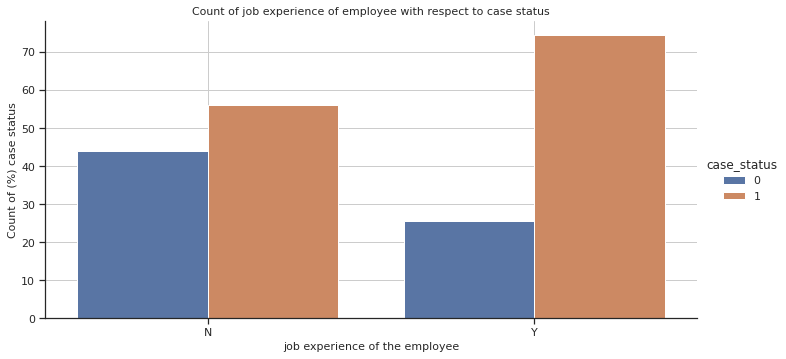

In [ ]:
# function to plot stacked bar chart, to check the job experience of the employee has any impact with the case status

df_vals = df_easy_visa_cpy.groupby('has_job_experience')['case_status'].value_counts(normalize=True).sort_index().to_frame('percentages')*100
df_vals = df_vals.reset_index()
print (df_vals)
sns.set(style="ticks")
plt.figure(figsize = (15, 7));
sns.catplot(data = df_vals, x = 'has_job_experience', y = 'percentages', hue = 'case_status',
                 kind='bar', height = 5, aspect=2)
plt.title("Count of job experience of employee with respect to case status", fontsize=11)
plt.xlabel("job experience of the employee", fontsize=11);
plt.ylabel("Count of (%) case status", fontsize=11);
plt.grid()

####Observation

1. It is observed that employee with job experience have 74% case status as certified.
2. It is observed that employee with job experience have the least 25% Denied.



4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 

  unit_of_wage  case_status  percentages
0         Hour            0    65.368567
1         Hour            1    34.631433
2        Month            0    38.202247
3        Month            1    61.797753
4         Week            0    37.867647
5         Week            1    62.132353
6         Year            0    30.114973
7         Year            1    69.885027


<Figure size 1080x504 with 0 Axes>

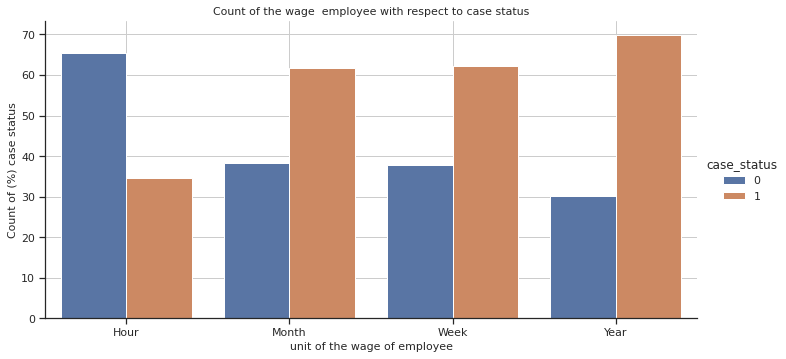

In [ ]:
# function to plot stacked bar chart, to check the unit of the wage employee has any impact with the case status

df_vals = df_easy_visa_cpy.groupby('unit_of_wage')['case_status'].value_counts(normalize=True).sort_index().to_frame('percentages')*100
df_vals = df_vals.reset_index()
print (df_vals)
sns.set(style="ticks")
plt.figure(figsize = (15, 7));
sns.catplot(data = df_vals, x = 'unit_of_wage', y = 'percentages', hue = 'case_status',
                 kind='bar', height = 5, aspect=2)


plt.title("Count of the wage  employee with respect to case status", fontsize=11)
plt.xlabel("unit of the wage of employee", fontsize=11);
plt.ylabel("Count of (%) case status", fontsize=11);
plt.grid()

####Observations

1.   It is observed that Year Unit of wage of employees have 70% chance of being certified.
2.   It is observed that Month unit of wage has 61.7%, week has 62.2% and Hour has 34.6% chance of case status as certified.

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

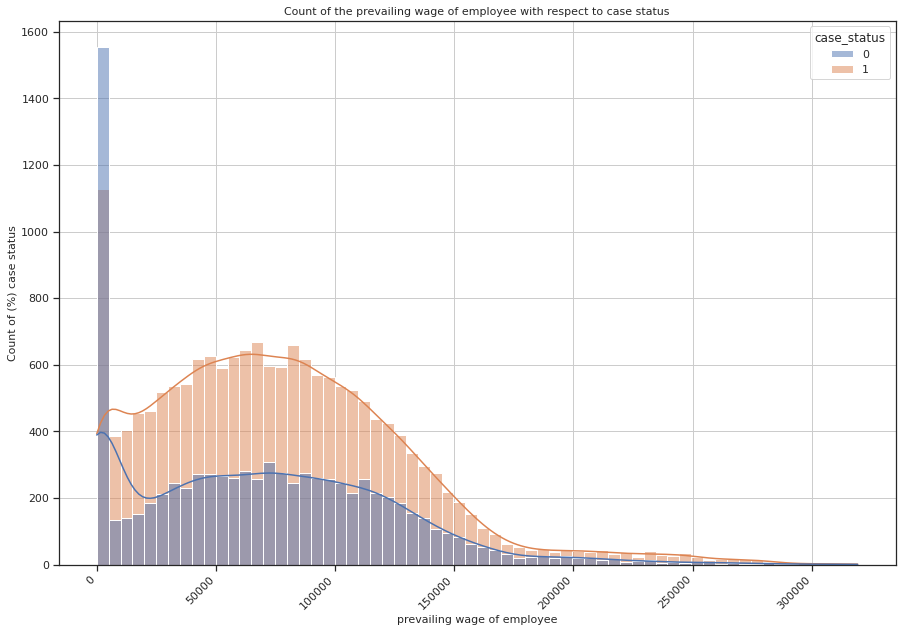

In [ ]:
# function to plot hist chart, to check the prevailing wage employee has any impact with the case status

plt.figure(figsize=(15,10))
sns.set(style="ticks")
sns.histplot(df_easy_visa_cpy, x = "prevailing_wage", hue = "case_status", kde=True)
plt.xticks(rotation= 45, ha='right');
plt.title("Count of the prevailing wage of employee with respect to case status", fontsize=11)
plt.xlabel("prevailing wage of employee", fontsize=11);
plt.ylabel("Count of (%) case status", fontsize=11);
plt.grid()

####Observations

1.   It is observed that no# of denied case status less , when the prevailing wage of employee is less and gradually increases when the prevailing wage increases. 

# Preparing data for modeling

In [ ]:
#Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 17836
Number of rows in test data = 7644


####Observations

1.   It is observed that Number of rows in the train data is 17836 rows.
2.   It is observed that Number of rows in the test data is 7644 rows.





In [ ]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17836 entries, 21 to 22922
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   const                              17836 non-null  float64
 1   no_of_employees                    17836 non-null  int64  
 2   yr_of_estab                        17836 non-null  int64  
 3   prevailing_wage                    17836 non-null  float64
 4   continent_Asia                     17836 non-null  uint8  
 5   continent_Europe                   17836 non-null  uint8  
 6   continent_North America            17836 non-null  uint8  
 7   continent_Oceania                  17836 non-null  uint8  
 8   continent_South America            17836 non-null  uint8  
 9   education_of_employee_Doctorate    17836 non-null  uint8  
 10  education_of_employee_High School  17836 non-null  uint8  
 11  education_of_employee_Master's     17836 non-null  ui

# Model evaluation criterion


The model can make wrong predictions as:
1. Certifying a person when the require criteria is not met.
2. Denying a person when the require criteria is met.

Which metric to optimize?

In general, F1-Score needs to be maximized, as the greater the F1-Score higher the chances of predicting both the classes correctly with out any issues.


## Building bagging and boosting models

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Decision Tree Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.660387  0.745152   0.746029  0.74559


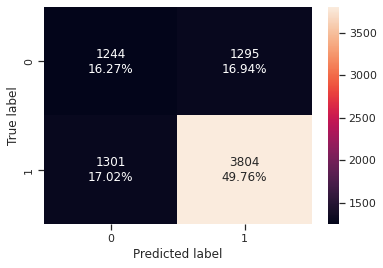

In [ ]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",d_tree_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(d_tree,X_test,y_test)

####Observation

1. The decision tree is overfitting the training data as there is a huge difference between training and test scores for all the metrics.
2. The test recall is very low i.e. only 74%.



# Random Forest Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.720042  0.831342   0.768423  0.798645


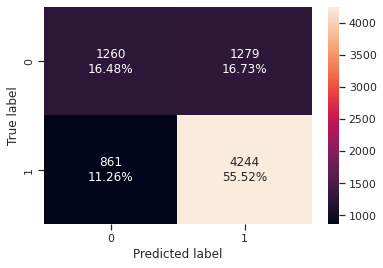

In [ ]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

####Observation

1.   It is observed that random tree classifier also is overfitting the model.



# Bagging Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.985367  0.986234   0.991812  0.989015
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.695578  0.768854   0.773856  0.771347


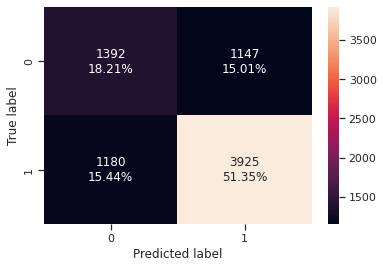

In [ ]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print("Training performance:\n", bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print("Testing performance:\n", bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)


####Observation

1.   It is observed that bagging classifier is also overfitting data.



# AdaBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.738058  0.887434   0.760411  0.819027
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.732993  0.885015    0.75653  0.815744


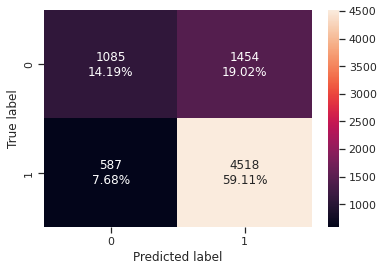

In [ ]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print("Training performance:\n", ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print("Testing performance:\n", ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

####Observation

1. It is observed that,  AdaBoost classifier is not found to overfit the training data. It is giving a generalized performance on the training & testing data with a F1 score of 0.819 & 0.816
2. It is observed that  the decision tree, random forest, or the bagging classifier are all overfitting models.

# Gradient Boost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.759419  0.882901   0.784106  0.830576
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.744767  0.873457   0.773595  0.820499


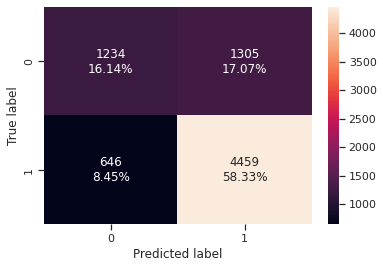

In [ ]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

####Observation

1. It is observed that Gradient Boost Classifier is not overfitting . 

# XGBoost Classifier

Training performance:
    Accuracy   Recall  Precision        F1
0  0.757233  0.88374   0.781415  0.829434
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.743851  0.876592   0.771153  0.820499


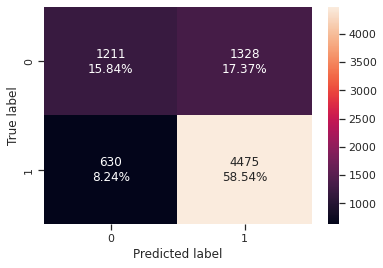

In [ ]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

##  Will tuning the hyperparameters improve the model performance?

# Decision Tree - Hyperparameter tuning

In [ ]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.668,1:0.332},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.668, 1: 0.332}, max_depth=2,
                       max_leaf_nodes=2, min_impurity_decrease=0.0001,
                       random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.712548  0.931923   0.720067  0.812411
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.706567  0.930852   0.715447  0.809058


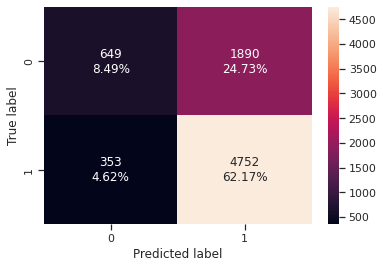

In [ ]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

####Observation

1. It is observed that  hyperparameter tuning the  decision tree has helped the model tuned not to  overfiting the dataset, and the  F1 score has improved.
2.  F1 score for both the train and test datasets are 0.812 and  0.809 respectively.

# Random Forest Classifier - Hyper parameter Tuning

In [ ]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.668,1:0.332},random_state=1,oob_score=True,bootstrap=True)


parameters = {  
                'max_depth': list(np.arange(10,30,10)) + [None],
                'max_features': ['sqrt', 'log2', None],
                'min_samples_leaf': np.arange(5,15,5),
                'min_samples_split': np.arange(5, 20, 5),
                'n_estimators': np.arange(20,120,40)}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)


RandomForestClassifier(class_weight={0: 0.668, 1: 0.332}, max_depth=20,
                       max_features=None, min_samples_leaf=5,
                       min_samples_split=5, oob_score=True, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.875308  0.885503   0.924621  0.904639
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.719257  0.788247   0.790725  0.789484


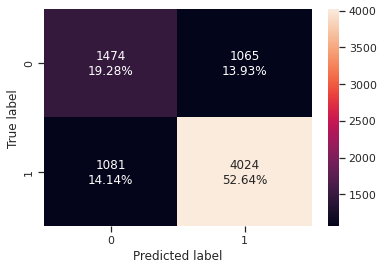

In [ ]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

####Observation

1. It is observed that Hyperparameter tuning increased F1 score on training dataset , but not on the testing set . However, this model is not performing as optimally as the  decision tree hyperparameter tuned.

# Bagging - Hyper parameter Tuning

In [ ]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=50,
                  random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.988619  0.998321   0.984846  0.991538
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.732862  0.885211   0.756318  0.815704


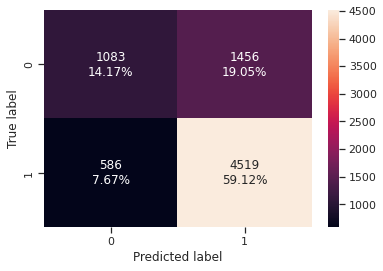

In [ ]:

#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print("Training performance:\n", bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print("Testing performance:\n", bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

####Observation

1.   It is observed that model is still overfitting and the evaluation metrics between the training and test have huge discrepancy.



# Ada Boost - Hyper parameter Tuning

In [ ]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),
                      DecisionTreeClassifier(max_depth=2)],
    "n_estimators": np.arange(20,120,40),
    "learning_rate":np.arange(0.2,2,0.6)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.2, n_estimators=60, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.751177  0.879124   0.777448  0.825165
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.739273  0.871694   0.768832  0.817038


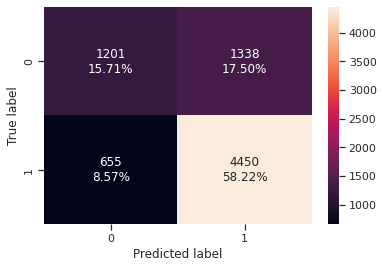

In [ ]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print("Training performance:\n", abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print("Testing performance:\n", abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

####Observation

1. It is observed that AdaBoost Hyper Tuning is almost performing good with not high difference in metrics between Training and Test data.

# GradientBoosting  - Hyper Parameter Tuning

In [ ]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,175,250],
    "subsample":[0.8,1],
    "max_features":[0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, random_state=1, subsample=1)

Training performance:
    Accuracy    Recall  Precision       F1
0  0.757233  0.881726   0.782421  0.82911
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.745945  0.875808   0.773663  0.821573


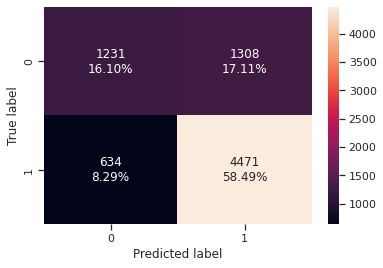

In [ ]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

####Observation

1. It is observed that F1 score is good between the training and test data after using the hyper parameter tuning.

# XG Boost - Hyper Parameter Tuning

In [ ]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(eval_metric='logloss', n_estimators=50, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.749776  0.899186   0.766566  0.827597
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.739796  0.895593   0.758461  0.821342


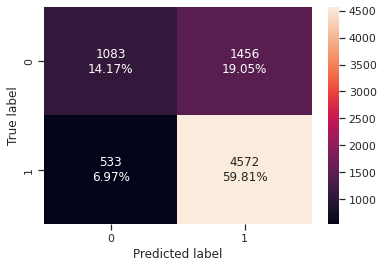

In [ ]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

####Observation

1. It is observed that F1 score is good between the training and test data after using the hyper parameter tuning.

# Stacking Classifier

In [ ]:
estimators = [('Ad Boost Tuned',abc_tuned), ('Gradient Boost Tuned',gbc_tuned), ('Decision Tree Tuned',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Ad Boost Tuned',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                                                   learning_rate=0.2,
                                                   n_estimators=60,
                                                   random_state=1)),
                               ('Gradient Boost Tuned',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Decision Tree Tuned',
                                DecisionTreeClassifier(class_weight={0: 0.668,
                                                                     1: 0.332},
                                            

Training performance:
    Accuracy    Recall  Precision        F1
0  0.757793  0.885839   0.780952  0.830095
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.743982  0.878355   0.770447  0.82087


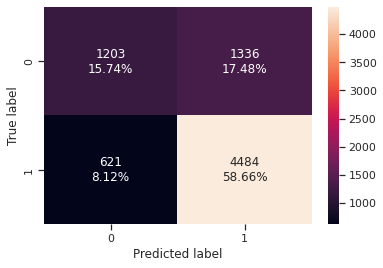

In [ ]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

          Observation

      1.  The model is not overfitting & gives generalized performance 
          with training & testing F1 scores of 0.828 & 0.8202 
      2.  The model is able to identify the majority of cases that should 
          be certified correctlly, but not as many cases that should be 
          denied correctly



## Model Performance Comparison and Conclusions

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df


Training performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.712548,1.0,0.875308,0.985367,0.988619,0.738058,0.751177,0.759419,0.757233,0.757233,0.749776,0.757793
Recall,1.0,0.931923,1.0,0.885503,0.986234,0.998321,0.887434,0.879124,0.882901,0.881726,0.883740,0.899186,0.885839
Precision,1.0,0.720067,1.0,0.924621,0.991812,0.984846,0.760411,0.777448,0.784106,0.782421,0.781415,0.766566,0.780952
F1,1.0,0.812411,1.0,0.904639,0.989015,0.991538,0.819027,0.825165,0.830576,0.829110,0.829434,0.827597,0.830095


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.660387,0.706567,0.720042,0.719257,0.695578,0.732862,0.732993,0.739273,0.744767,0.745945,0.743851,0.739796,0.743982
Recall,0.745152,0.930852,0.831342,0.788247,0.768854,0.885211,0.885015,0.871694,0.873457,0.875808,0.876592,0.895593,0.878355
Precision,0.746029,0.715447,0.768423,0.790725,0.773856,0.756318,0.756530,0.768832,0.773595,0.773663,0.771153,0.758461,0.770447
F1,0.745590,0.809058,0.798645,0.789484,0.771347,0.815704,0.815744,0.817038,0.820499,0.821573,0.820499,0.821342,0.820870


####Observation

1. It is observed that below models are overfitting the training and Test models :


      > Decision tree, , Bagging classifier (default & tuned) & XGBoost were found to overfit the training dataset

      > Random forest (default & tuned) found to overfit the training dataset


2. It is observed that below models give good performance on the training and testing data sets.



      > Decision tree tuned, Adaboost (default & tuned), Gradient 
      boost (default & tuned) and XGBoost (tuned) were found to 
      give generalized performance on the training & testing data sets.

---









# Feature importance of XGBoost Hyperparameter Tuned Model

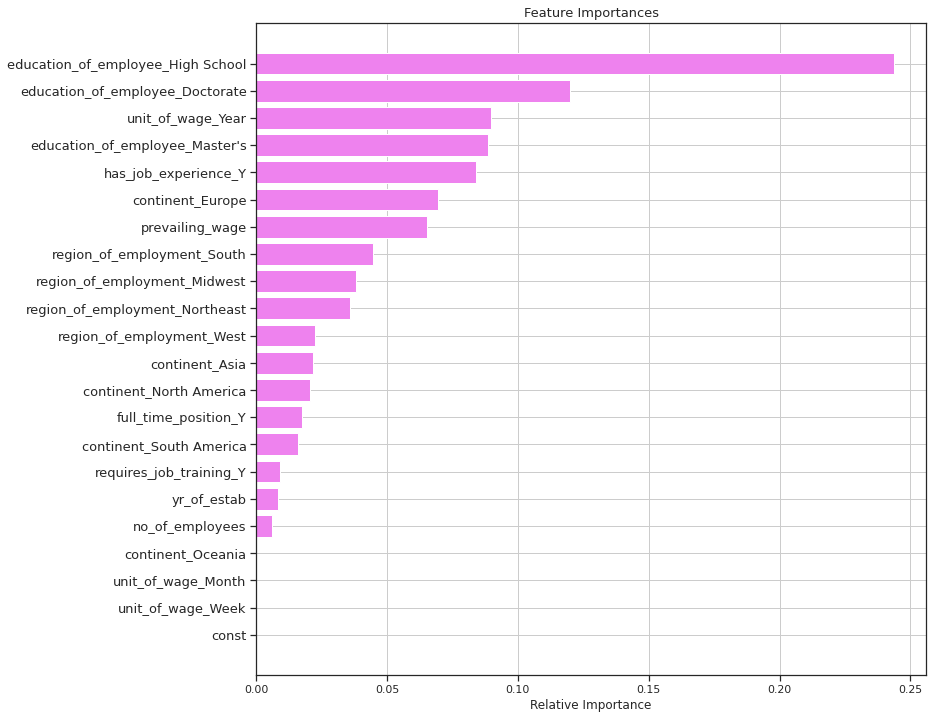

In [ ]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances', Fontsize=13)
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices], Fontsize=13)
plt.xlabel('Relative Importance')
plt.grid()
plt.show()

# Feature importance of Gradient Boost Hyperparameter Tuned Model

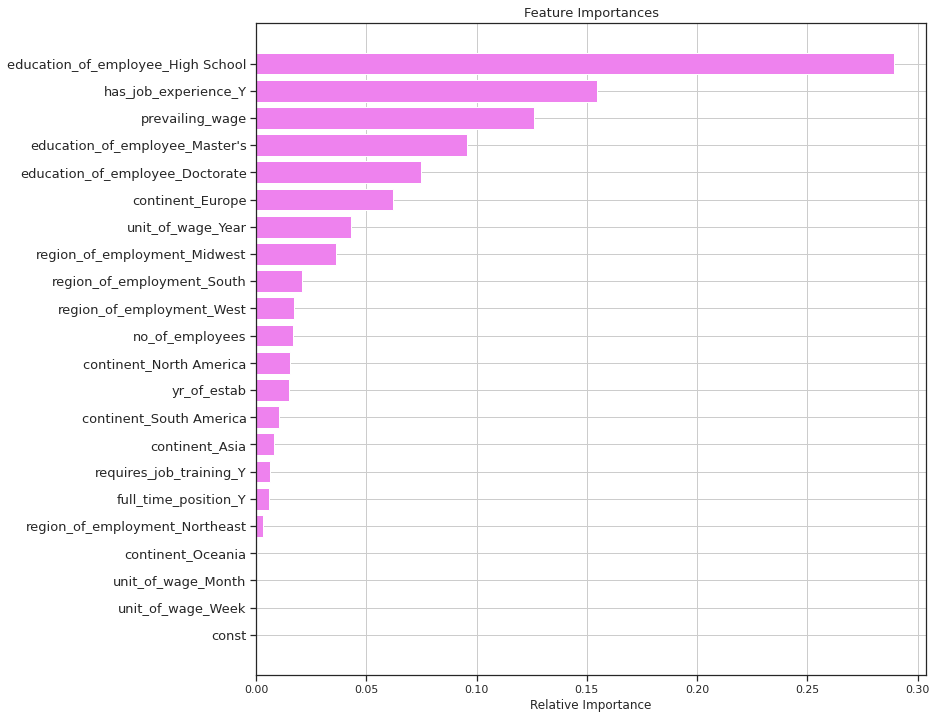

In [ ]:
feature_names = X_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances', Fontsize=13)
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices], Fontsize=13)
plt.xlabel('Relative Importance')
plt.grid()
plt.show()

####Observation

1. It is observed that below features play a significant role :



      1.   education of employee,
      2.   Job experience (Y)
      3.   unit of wage (Year)
      4.   prevailing wage 
      5.   continent of the employee 
      6.   Year of establishment 








## Actionable Insights and Recommendations

1. It is observed that education of the employees, plays a major role in case of denied or certified.
2. It is observed that 88.4% of the employees donot require job training.
3. It is observed that employees with case status Certified is 66.8%
4. It is observed that Doctorate have less number of case status as rejected/Denied with 12.7% ,Masters have case status as rejected/Denied as 21.3%,
   and Bachelor's have less number of case status as rejected/Denied as 37.7%, High School has the highest number of rejections as Denied with 65%
5. attributes like if the job opportunity is full time/ part time ; if an employee requires further job training ; the annual prevailing wage of the occupation in the US ; year of establishment of the employer or the number of employees in the organization are also important attributes.
6. It is observed that region of employment is an important parameter , midwest has highest number of case status as certified with 76%
7.  Surprisingly, It is observed that Doctorate from Africa continent have highest number of case status as denied, but need to understand on what reasons these denials are happening.
8. It is observed that Doctorate from North america continent have highest number of case status as denied.
9. The XGBoost hyperparameter tuned ML model is able to give generalized prediction on training & testing datasets (not prone to overfitting) and is able to explain over 80% of information recall  (accuracy of 75% on test dataset & F1 score of 82% on test dataset).
10. The confusion matrix is able to identify a higher % of cases getting certified, but only a smaller % of cases getting denied correctly.
11. It is observed that , we need to understand on the reasons these small (%) of cases are denied.
12. As, the number of high school cases for denial has increased it is better to know the reason(s) and understand to reduce the denials.
13. It is observed that prevailing wage plays an important role and as the prevailing wage increases high above the median value , chances of rejection can be high as it requires special skills .
14. It is observed that Master and Bachelors are in high number , when we consider employees above the prevailing wage .Interestingly, Doctorates have the  lowest denials.